Preproceessing

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd


#  Import and read the charity_data.csv.
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
import tensorflow as tf

In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN","NAME"], axis=1)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [9]:
# Look at APPLICATION_TYPE value counts for binning
app_type_count = application_df.APPLICATION_TYPE.value_counts()
app_type_count

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

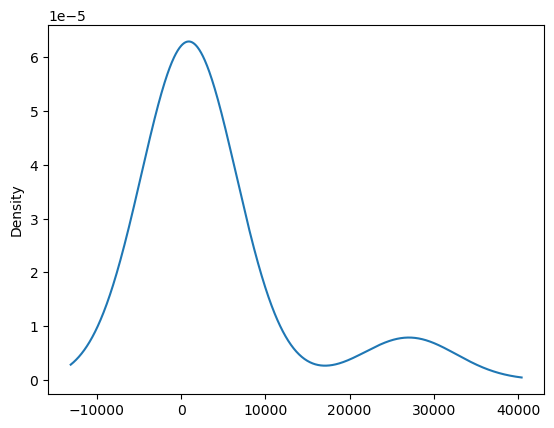

In [10]:
# Visualize the value counts of APPLICATION_TYPE
app_type_count.plot.density()

In [11]:
# Determine which values to replace if counts are less than ...?
replace_application = list(app_type_count[app_type_count < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [12]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df.CLASSIFICATION.value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

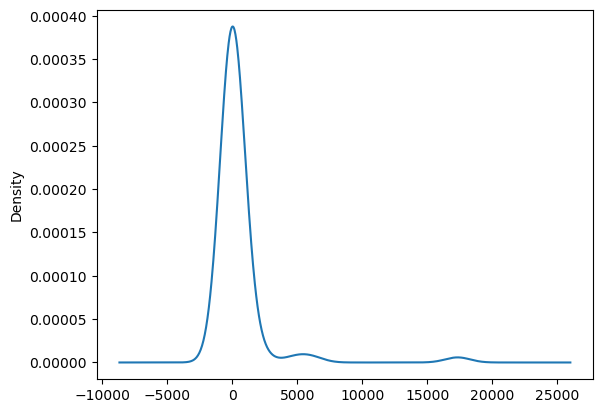

In [13]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [14]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [15]:
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [16]:
# Generate our categorical variable lists
application_cat = ["APPLICATION_TYPE", "AFFILIATION", "CLASSIFICATION", "USE_CASE", "ORGANIZATION", "INCOME_AMT", "SPECIAL_CONSIDERATIONS"]

In [17]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\Kenn\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True).drop(columns=application_cat, axis=1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL
X = application_df.drop("IS_SUCCESSFUL", axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [20]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Trying more nodes 

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
nodes_hidden_layer1 = 140
nodes_hidden_layer2 = 80

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer1, activation="relu", input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 140)               6160      
                                                                 
 dense_1 (Dense)             (None, 80)                11280     
                                                                 
 dense_2 (Dense)             (None, 1)                 81        
                                                                 
Total params: 17,521
Trainable params: 17,521
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [23]:
# Checkpoint Stuff

# dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

In [24]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5683 - accuracy: 0.7238
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5549 - accuracy: 0.7309
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5524 - accuracy: 0.7299
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5497 - accuracy: 0.7296
Epoch 5/100
789/804 [============================>.] - ETA: 0s - loss: 0.5485 - accuracy: 0.7320
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5483 - accuracy: 0.7321
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5477 - accuracy: 0.7331
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5469 - accuracy: 0.7324
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5463 - accuracy: 0.7330
Epoch 9/100
804/804 [==============================] -

789/804 [============================>.] - ETA: 0s - loss: 0.5351 - accuracy: 0.7399
Epoch 65: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5354 - accuracy: 0.7394
Epoch 66/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5350 - accuracy: 0.7405
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5353 - accuracy: 0.7394
Epoch 68/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5348 - accuracy: 0.7397
Epoch 69/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5349 - accuracy: 0.7395
Epoch 70/100
804/804 [==============================] - ETA: 0s - loss: 0.5346 - accuracy: 0.7392
Epoch 70: saving model to checkpoints\weights.70.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5346 - accuracy: 0.7392
Epoch 71/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5347 - accuracy: 0.7396
Epoch 72/100
804/804 

In [25]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5654 - accuracy: 0.7290 - 352ms/epoch - 1ms/step
Loss: 0.5654253363609314, Accuracy: 0.7289795875549316


In [ ]:
# Adding third hidden layer 

In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
nodes_hidden_layer1 = 100
nodes_hidden_layer2 = 50
nodes_hidden_layer3 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer1, activation="relu", input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               4400      
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 20)                1020      
                                                                 
 dense_6 (Dense)             (None, 1)                 21        
                                                                 
Total params: 10,491
Trainable params: 10,491
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [28]:
# Checkpoint Stuff

# dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

In [29]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
804/804 [==============================] - 2s 1ms/step - loss: 0.5672 - accuracy: 0.7206
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5538 - accuracy: 0.7276
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5512 - accuracy: 0.7292
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5488 - accuracy: 0.7317
Epoch 5/100
792/804 [============================>.] - ETA: 0s - loss: 0.5480 - accuracy: 0.7315
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5477 - accuracy: 0.7319
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5470 - accuracy: 0.7327
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5462 - accuracy: 0.7332
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5453 - accuracy: 0.7339
Epoch 9/100
804/804 [==============================] -

766/804 [===========================>..] - ETA: 0s - loss: 0.5345 - accuracy: 0.7393
Epoch 65: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5346 - accuracy: 0.7396
Epoch 66/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5347 - accuracy: 0.7394
Epoch 67/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5351 - accuracy: 0.7389
Epoch 68/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5343 - accuracy: 0.7397
Epoch 69/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5345 - accuracy: 0.7395
Epoch 70/100
783/804 [============================>.] - ETA: 0s - loss: 0.5341 - accuracy: 0.7395
Epoch 70: saving model to checkpoints\weights.70.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5342 - accuracy: 0.7396
Epoch 71/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5346 - accuracy: 0.7394
Epoch 72/100
804/804 

In [30]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5669 - accuracy: 0.7279 - 516ms/epoch - 2ms/step
Loss: 0.5668731331825256, Accuracy: 0.7279300093650818


In [ ]:
# Adding epochs / trying Tanh function instead of reLU

In [31]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
nodes_hidden_layer1 = 80
nodes_hidden_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer1, activation="tanh", input_dim=number_input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=nodes_hidden_layer2, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 80)                3520      
                                                                 
 dense_8 (Dense)             (None, 30)                2430      
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [33]:
# Checkpoint Stuff
# dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

In [34]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=150, callbacks=[cp_callback])

Epoch 1/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5715 - accuracy: 0.7196
Epoch 2/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5553 - accuracy: 0.7289
Epoch 3/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5518 - accuracy: 0.7294
Epoch 4/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5499 - accuracy: 0.7296
Epoch 5/150
770/804 [===========================>..] - ETA: 0s - loss: 0.5491 - accuracy: 0.7305
Epoch 5: saving model to checkpoints\weights.05.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5488 - accuracy: 0.7311
Epoch 6/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5472 - accuracy: 0.7316
Epoch 7/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5462 - accuracy: 0.7318
Epoch 8/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5462 - accuracy: 0.7330
Epoch 9/150
804/804 [==============================] -

802/804 [============================>.] - ETA: 0s - loss: 0.5332 - accuracy: 0.7403
Epoch 65: saving model to checkpoints\weights.65.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5332 - accuracy: 0.7403
Epoch 66/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5331 - accuracy: 0.7412
Epoch 67/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5329 - accuracy: 0.7397
Epoch 68/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5327 - accuracy: 0.7404
Epoch 69/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5328 - accuracy: 0.7406
Epoch 70/150
772/804 [===========================>..] - ETA: 0s - loss: 0.5319 - accuracy: 0.7419
Epoch 70: saving model to checkpoints\weights.70.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5327 - accuracy: 0.7412
Epoch 71/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5325 - accuracy: 0.7409
Epoch 72/150
804/804 

804/804 [==============================] - 1s 1ms/step - loss: 0.5303 - accuracy: 0.7404
Epoch 128/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5303 - accuracy: 0.7419
Epoch 129/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5302 - accuracy: 0.7413
Epoch 130/150
786/804 [============================>.] - ETA: 0s - loss: 0.5310 - accuracy: 0.7419
Epoch 130: saving model to checkpoints\weights.130.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5303 - accuracy: 0.7423
Epoch 131/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5304 - accuracy: 0.7416
Epoch 132/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5305 - accuracy: 0.7414
Epoch 133/150
804/804 [==============================] - 1s 1ms/step - loss: 0.5303 - accuracy: 0.7419
Epoch 134/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5301 - accuracy: 0.7417
Epoch 135/150
798/804 [==========================

In [35]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5590 - accuracy: 0.7307 - 402ms/epoch - 1ms/step
Loss: 0.5589851140975952, Accuracy: 0.7307288646697998


In [36]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")